In [1]:
import cv2 as cv
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt

## Numbers Recognition Ideation

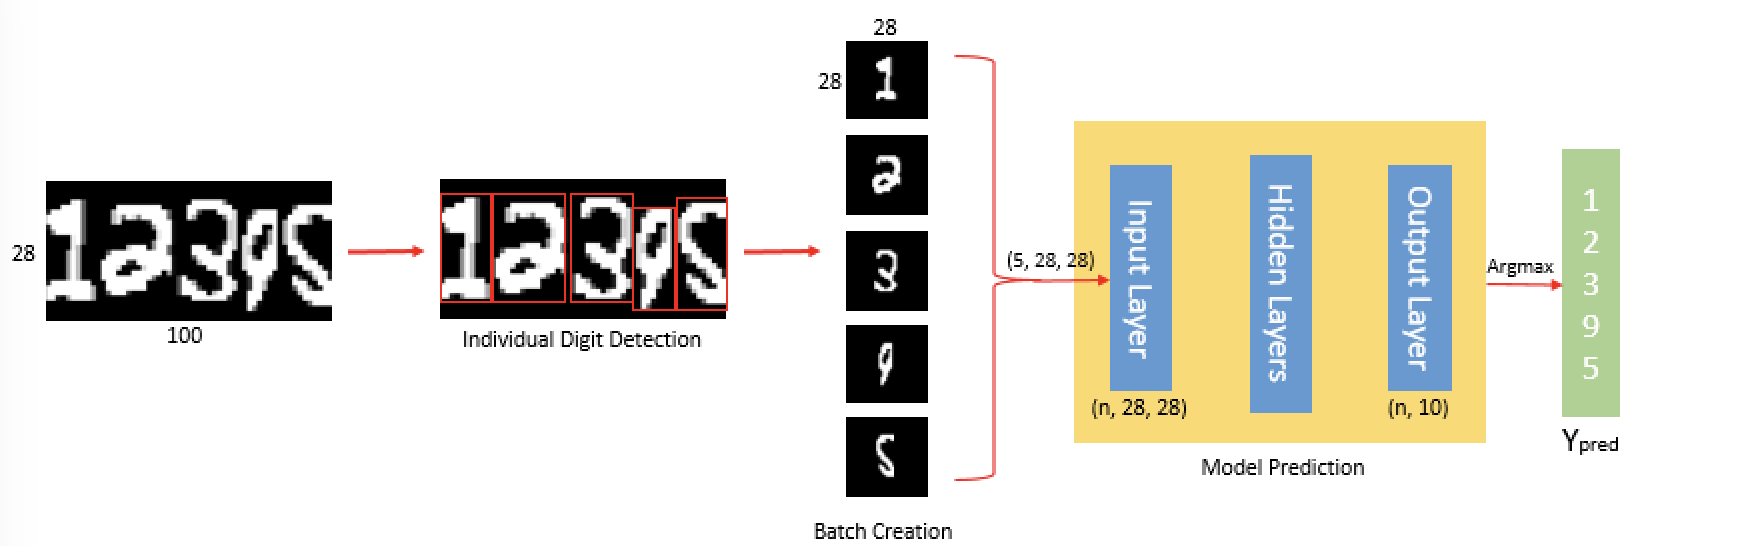


**Future TODO:**
- Add some Morphological transformations like Erosion to able to use images with noise for this process.
- Use a more complex model like CNN when the images would have some backgrounds resembleing rules or grids of a paper.
- Use a two stage prediction process for Numbers detection and Numbers recognition.

### Reading the preprocessing the image

In [2]:
filename = "12395.png"
image = cv.bitwise_not(cv.cvtColor(cv.imread(filename), cv.COLOR_RGB2GRAY))

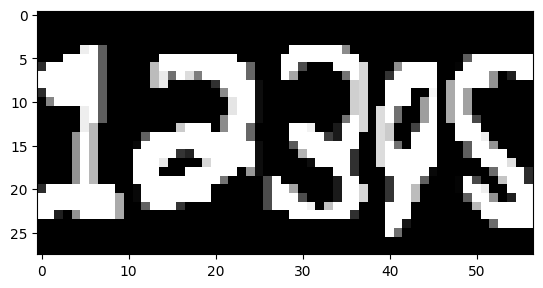

In [3]:
plt.imshow(image, cmap='gray')

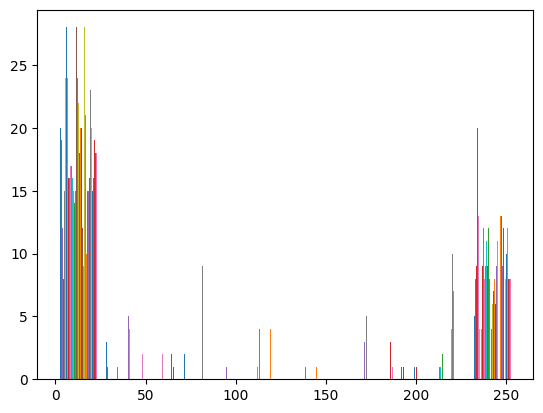

In [4]:
plt.hist(image);

### Preprocessing functions

In [5]:
def padding(_image, front=0, back=0):
    _image = np.concatenate([np.zeros((28, front)),
                            _image,
                            np.zeros((28, back))], axis=1)
    return _image

In [12]:
def filter_number(image):
  th = 200
  start = None
  end = None
  results = []
  for i in range(image.shape[1]):
      if start == None:
          if np.any(image[:, i] > th):
              start = i
      else:
          if np.all(image[:, i] < th):
              end = i
              results.append([start, end])
              start = None
              end = None
  return results

In [117]:
def resize_single_image(_image, use_resize=True):
    if use_resize:
        pad = (28-_image.shape[1])//2
        _image = padding(_image, front=pad, back=pad)
        _image = cv.resize(_image, (28, 28))
    else:
        front_padding = (28 - _image[3].shape[1])//2
        back_padding  = (28 - (_image[3].shape[1] + front_padding))
        _image = padding(_image, front=front_padding, back=back_padding)
    return _image

In [118]:
def create_image_batch(results, image):
  return np.array([resize_single_image(image[:, i[0]:i[1]])/255.0 for i in results])

### Extracting individual numbers from the image

In [119]:
processed_img = padding(image, front=5, back=5)
individual_number_idx = filter_number(processed_img)

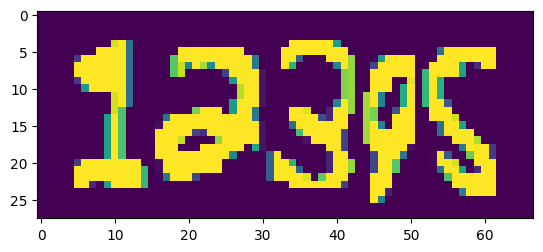

In [120]:
plt.imshow(processed_img)

In [121]:
batch_images = create_image_batch(individual_number_idx, processed_img)

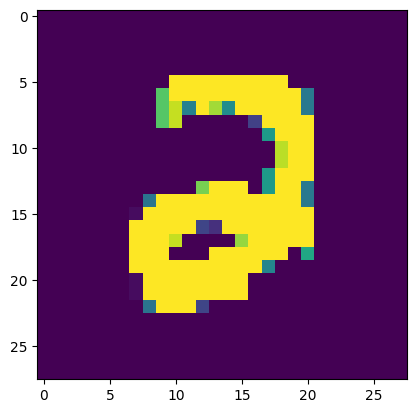

In [130]:
plt.imshow(batch_images[1])

## Loading the model

In [123]:
model = tf.keras.models.load_model("simple_mnist_model.h5")

In [124]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [125]:
batch_images.shape

(5, 28, 28)

In [126]:
y = model.predict(batch_images)

1/1 [==============================] - 0s 66ms/step


## Predicted Labels

In [127]:
np.argmax(y, axis=1)

array([1, 2, 3, 9, 5])

## Actual Labels

In [128]:
list(map(int, filename.split(".png")[0]))

[1, 2, 3, 9, 5]